In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
file_path = '3D_printer.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Encode categorical features
le_material = LabelEncoder()
df['Material'] = le_material.fit_transform(df['Material'])
le_infill_pattern = LabelEncoder()
df['infill_pattern'] = le_infill_pattern.fit_transform(df['infill_pattern'])

# Define features and targets
X = df[['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
        'Material', 'Fan_speed', 'Roughness', 'Tension_strenght', 'Elongation']]
y_nozzle = df['nozzle_temperature']
y_bed = df['Bed_temperature']
y_speed = df['Print_speed']


In [ ]:
# Split data into training and test sets
X_train, X_test, y_nozzle_train, y_nozzle_test = train_test_split(
    X, y_nozzle, test_size=0.2, random_state=42)
_, _, y_bed_train, y_bed_test = train_test_split(
    X, y_bed, test_size=0.2, random_state=42)
_, _, y_speed_train, y_speed_test = train_test_split(
    X, y_speed, test_size=0.2, random_state=42)


In [ ]:
# Train Random Forest models for each target
rf_nozzle = RandomForestRegressor(random_state=42)
rf_nozzle.fit(X_train, y_nozzle_train)

rf_bed = RandomForestRegressor(random_state=42)
rf_bed.fit(X_train, y_bed_train)

rf_speed = RandomForestRegressor(random_state=42)
rf_speed.fit(X_train, y_speed_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test set
y_nozzle_pred = rf_nozzle.predict(X_test)
y_bed_pred = rf_bed.predict(X_test)
y_speed_pred = rf_speed.predict(X_test)

# Evaluation function
def print_metrics(y_true, y_pred, target):
    print(f'--- {target} ---')
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2:', r2_score(y_true, y_pred))
    print()

print_metrics(y_nozzle_test, y_nozzle_pred, 'Nozzle Temperature')
print_metrics(y_bed_test, y_bed_pred, 'Bed Temperature')
print_metrics(y_speed_test, y_speed_pred, 'Print Speed')


--- Nozzle Temperature ---
MAE: 2.8107142857142873
MSE: 15.465535714285712
RMSE: 3.9326245325845326
R2: 0.9185696440564137

--- Bed Temperature ---
MAE: 0.9321428571428564
MSE: 6.040535714285714
RMSE: 2.457750132598046
R2: 0.904520564516129

--- Print Speed ---
MAE: 8.885714285714284
MSE: 184.40964285714284
RMSE: 13.579751207483252
R2: 0.5757712441314553



In [ ]:
# Example: Predict for a new sample
# Modify the values as needed for your use case
# Example: PLA, grid, layer_height=0.2, wall_thickness=1.0, infill_density=20, fan_speed=100, roughness=30, tension_strenght=25, elongation=1.7
new_sample = [[0.2, 1.0, 20, le_infill_pattern.transform(['grid'])[0],
               le_material.transform(['pla'])[0], 100, 30, 25, 1.7]]
print('Predicted Nozzle Temp:', rf_nozzle.predict(new_sample)[0])
print('Predicted Bed Temp:', rf_bed.predict(new_sample)[0])
print('Predicted Print Speed:', rf_speed.predict(new_sample)[0])


Predicted Nozzle Temp: 220.15
Predicted Bed Temp: 80.35
Predicted Print Speed: 59.95


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


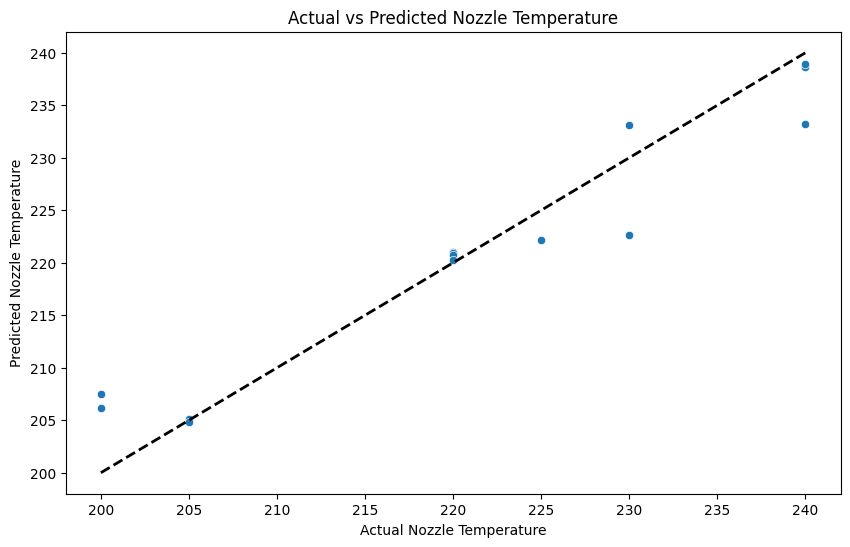

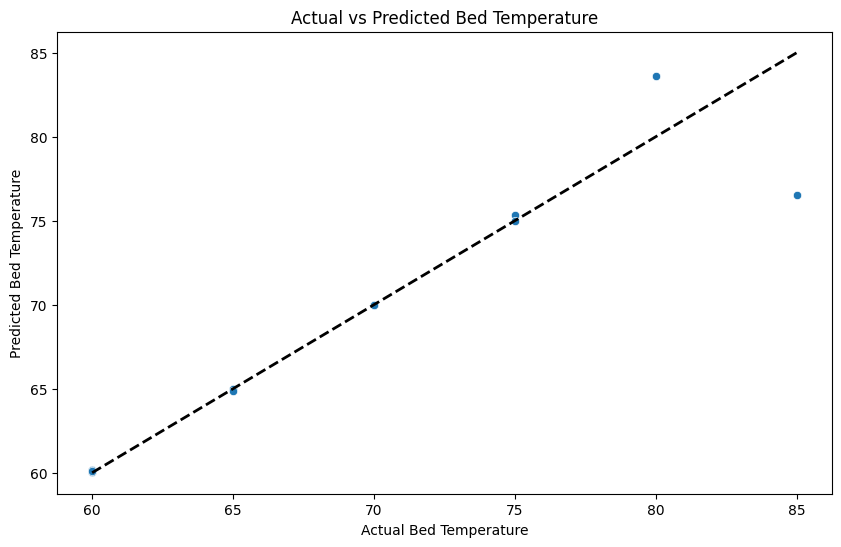

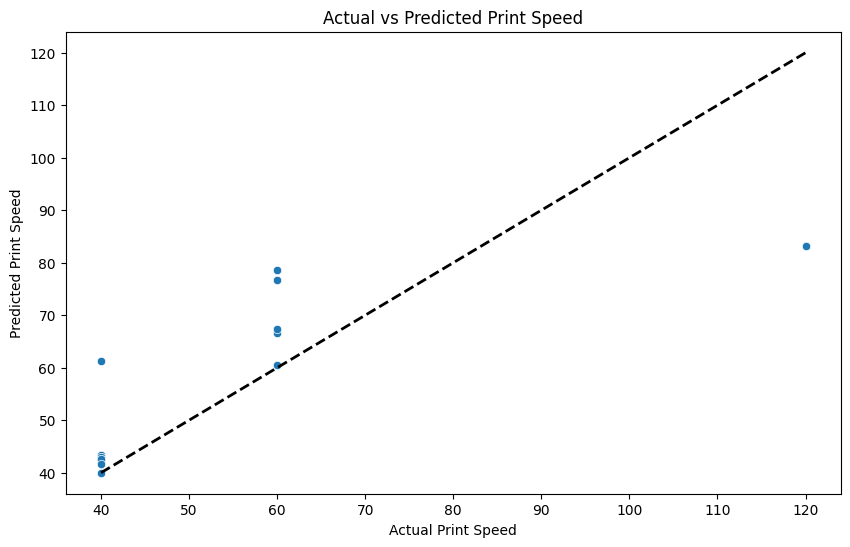

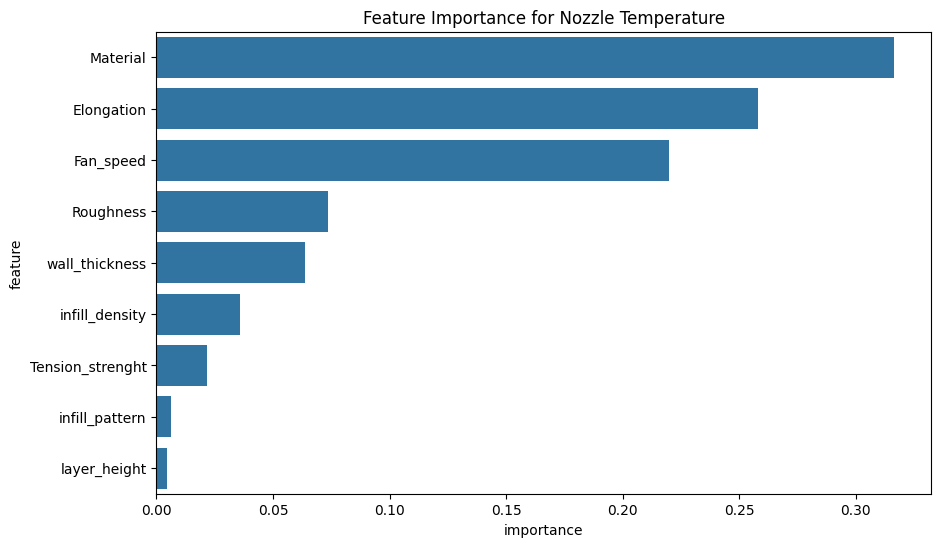

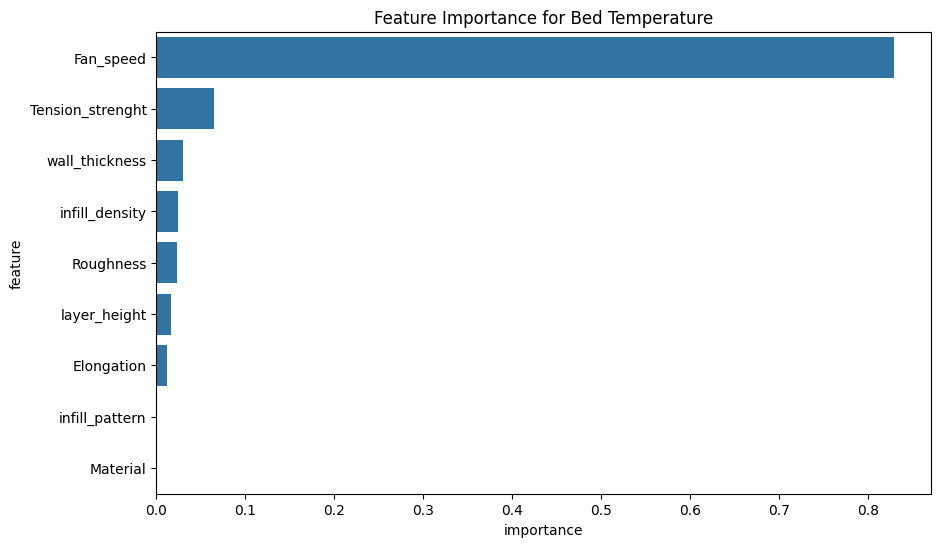

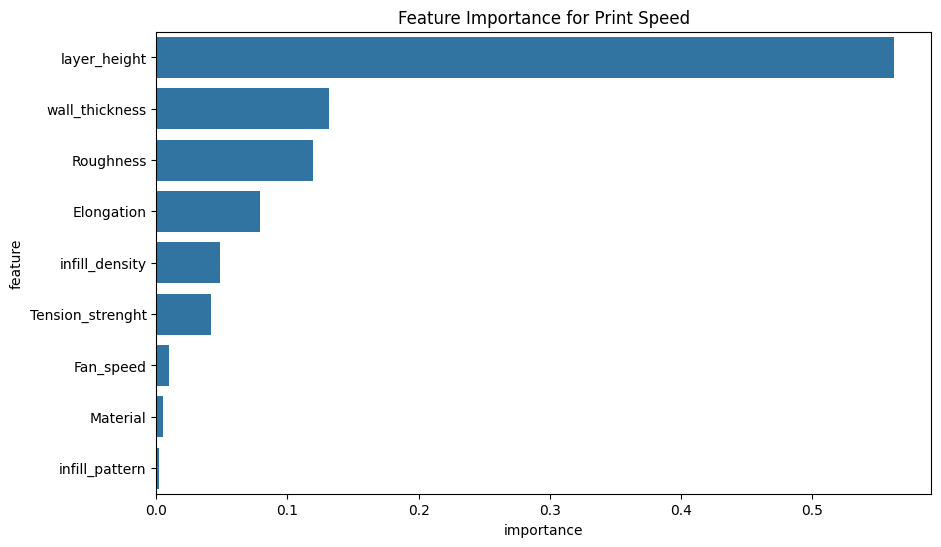

In [ ]:
# prompt: plot the graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Predictions vs Actuals for Nozzle Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_nozzle_test, y=y_nozzle_pred)
plt.xlabel("Actual Nozzle Temperature")
plt.ylabel("Predicted Nozzle Temperature")
plt.title("Actual vs Predicted Nozzle Temperature")
plt.plot([y_nozzle_test.min(), y_nozzle_test.max()], [y_nozzle_test.min(), y_nozzle_test.max()], 'k--', lw=2)
plt.show()

# Plotting Predictions vs Actuals for Bed Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_bed_test, y=y_bed_pred)
plt.xlabel("Actual Bed Temperature")
plt.ylabel("Predicted Bed Temperature")
plt.title("Actual vs Predicted Bed Temperature")
plt.plot([y_bed_test.min(), y_bed_test.max()], [y_bed_test.min(), y_bed_test.max()], 'k--', lw=2)
plt.show()

# Plotting Predictions vs Actuals for Print Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_speed_test, y=y_speed_pred)
plt.xlabel("Actual Print Speed")
plt.ylabel("Predicted Print Speed")
plt.title("Actual vs Predicted Print Speed")
plt.plot([y_speed_test.min(), y_speed_test.max()], [y_speed_test.min(), y_speed_test.max()], 'k--', lw=2)
plt.show()

# Plotting feature importance for each model (Optional)
def plot_feature_importance(model, features, target_name):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title(f'Feature Importance for {target_name}')
    plt.show()

plot_feature_importance(rf_nozzle, X.columns, 'Nozzle Temperature')
plot_feature_importance(rf_bed, X.columns, 'Bed Temperature')
plot_feature_importance(rf_speed, X.columns, 'Print Speed')

--- SVR Metrics ---
--- Nozzle Temperature ---
MAE: 10.906444549480609
MSE: 188.42815924621658
RMSE: 13.726913682478541
R2: 0.007873224653903388

--- Bed Temperature ---
MAE: 5.6826788325227415
MSE: 45.85221858537528
RMSE: 6.77142662851598
R2: 0.2752391255860036

--- Print Speed ---
MAE: 15.272480676259773
MSE: 462.47978914313273
RMSE: 21.505343269595414
R2: -0.06392064169077516

--- Linear Regression Metrics ---
--- Nozzle Temperature ---
MAE: 1.822594934397005
MSE: 5.632210312755184
RMSE: 2.373227825716525
R2: 0.9703448429469438

--- Bed Temperature ---
MAE: 1.828588562621307
MSE: 7.177131841826108
RMSE: 2.679016954374516
R2: 0.8865550128227486

--- Print Speed ---
MAE: 28.13461287360309
MSE: 1036.7714015443669
RMSE: 32.19893478897038
R2: -1.3850609706889196



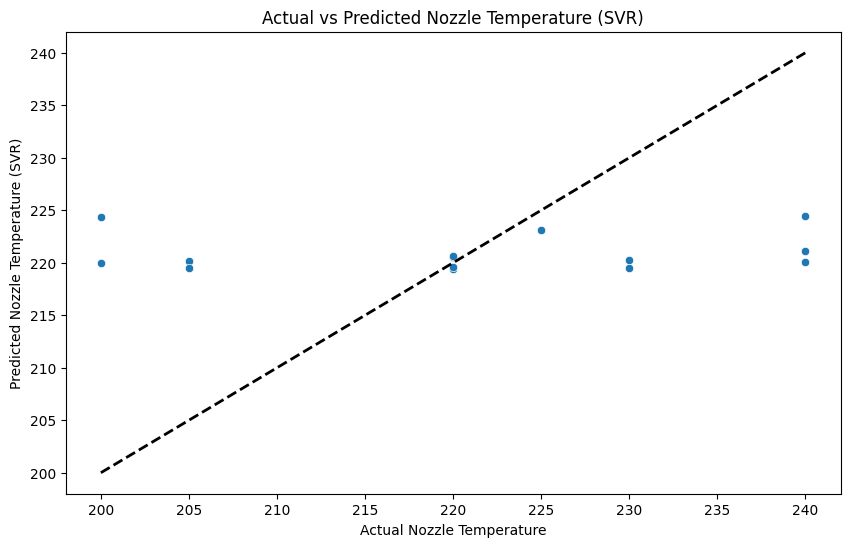

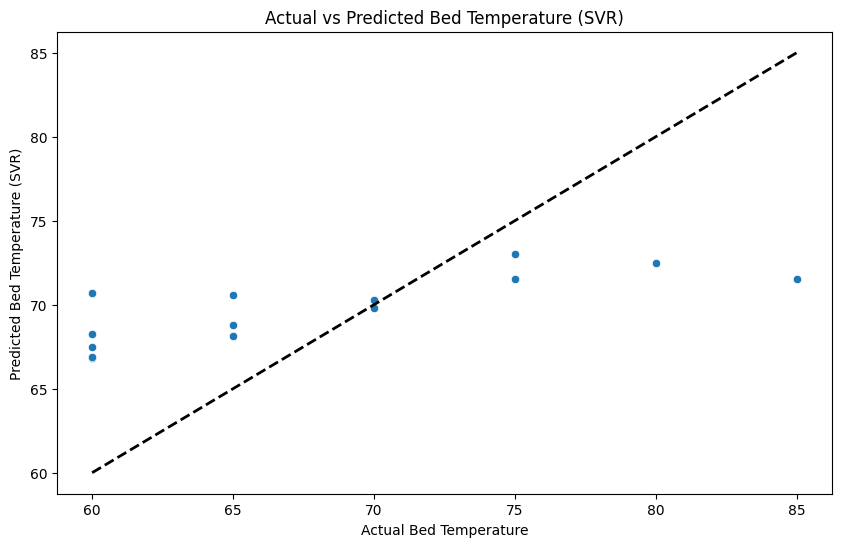

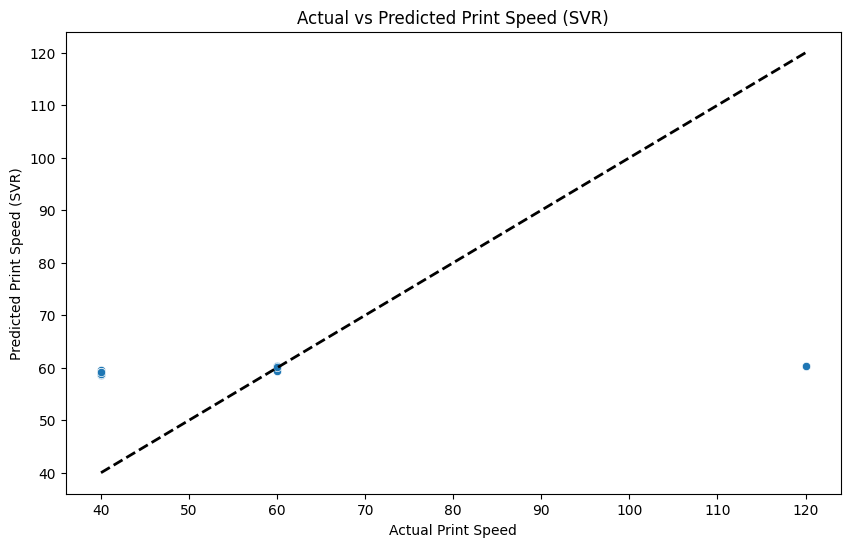

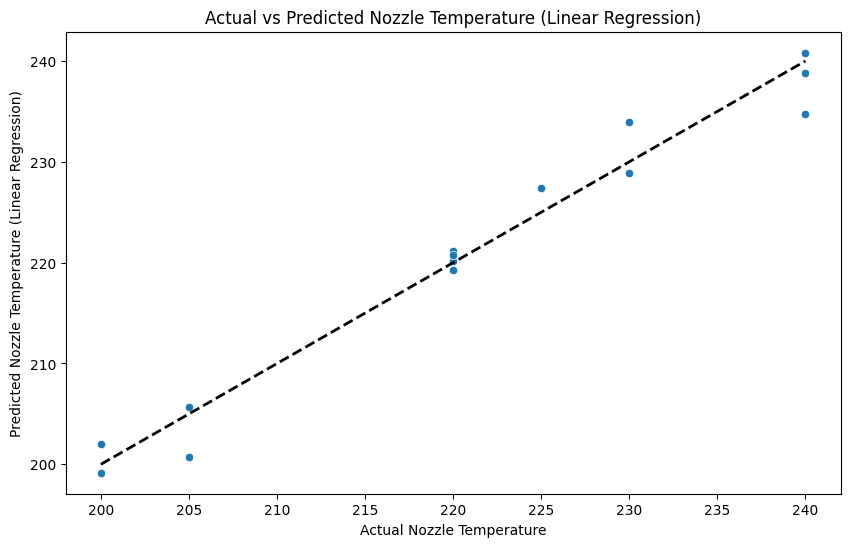

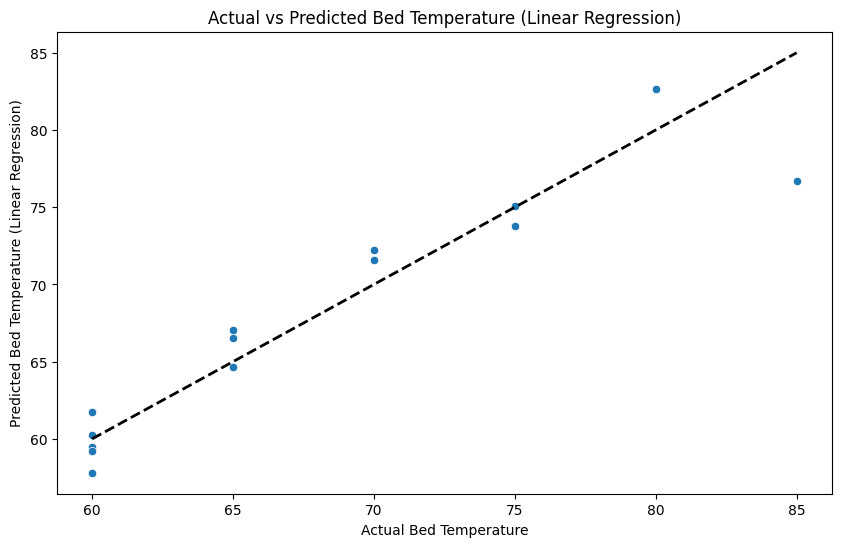

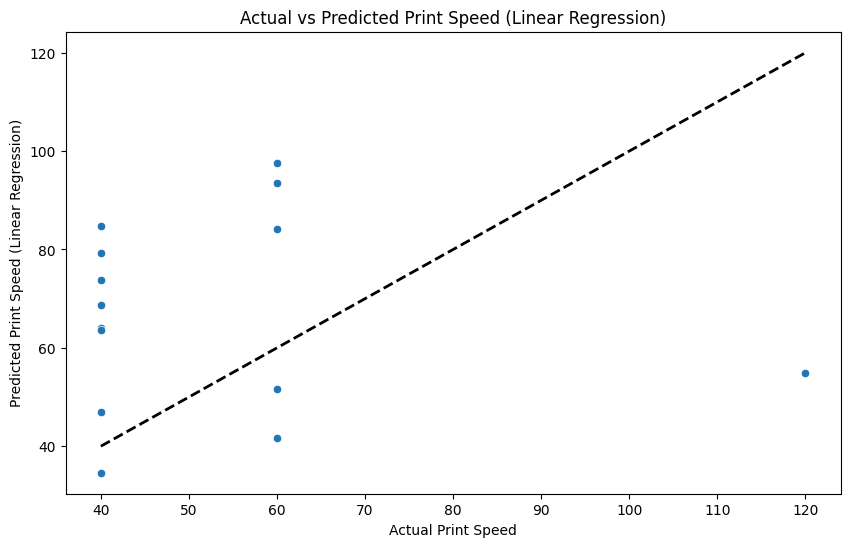

In [ ]:
# prompt: do the svm and linear regression and give the plots

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Train SVR models
svr_nozzle = SVR()
svr_nozzle.fit(X_train, y_nozzle_train)

svr_bed = SVR()
svr_bed.fit(X_train, y_bed_train)

svr_speed = SVR()
svr_speed.fit(X_train, y_speed_train)

# Predict with SVR
y_nozzle_pred_svr = svr_nozzle.predict(X_test)
y_bed_pred_svr = svr_bed.predict(X_test)
y_speed_pred_svr = svr_speed.predict(X_test)

# Evaluate SVR
print("--- SVR Metrics ---")
print_metrics(y_nozzle_test, y_nozzle_pred_svr, 'Nozzle Temperature')
print_metrics(y_bed_test, y_bed_pred_svr, 'Bed Temperature')
print_metrics(y_speed_test, y_speed_pred_svr, 'Print Speed')


# Train Linear Regression models
lr_nozzle = LinearRegression()
lr_nozzle.fit(X_train, y_nozzle_train)

lr_bed = LinearRegression()
lr_bed.fit(X_train, y_bed_train)

lr_speed = LinearRegression()
lr_speed.fit(X_train, y_speed_train)

# Predict with Linear Regression
y_nozzle_pred_lr = lr_nozzle.predict(X_test)
y_bed_pred_lr = lr_bed.predict(X_test)
y_speed_pred_lr = lr_speed.predict(X_test)

# Evaluate Linear Regression
print("--- Linear Regression Metrics ---")
print_metrics(y_nozzle_test, y_nozzle_pred_lr, 'Nozzle Temperature')
print_metrics(y_bed_test, y_bed_pred_lr, 'Bed Temperature')
print_metrics(y_speed_test, y_speed_pred_lr, 'Print Speed')


# Plotting Predictions vs Actuals for Nozzle Temperature (SVR)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_nozzle_test, y=y_nozzle_pred_svr)
plt.xlabel("Actual Nozzle Temperature")
plt.ylabel("Predicted Nozzle Temperature (SVR)")
plt.title("Actual vs Predicted Nozzle Temperature (SVR)")
plt.plot([y_nozzle_test.min(), y_nozzle_test.max()], [y_nozzle_test.min(), y_nozzle_test.max()], 'k--', lw=2)
plt.show()

# Plotting Predictions vs Actuals for Bed Temperature (SVR)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_bed_test, y=y_bed_pred_svr)
plt.xlabel("Actual Bed Temperature")
plt.ylabel("Predicted Bed Temperature (SVR)")
plt.title("Actual vs Predicted Bed Temperature (SVR)")
plt.plot([y_bed_test.min(), y_bed_test.max()], [y_bed_test.min(), y_bed_test.max()], 'k--', lw=2)
plt.show()

# Plotting Predictions vs Actuals for Print Speed (SVR)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_speed_test, y=y_speed_pred_svr)
plt.xlabel("Actual Print Speed")
plt.ylabel("Predicted Print Speed (SVR)")
plt.title("Actual vs Predicted Print Speed (SVR)")
plt.plot([y_speed_test.min(), y_speed_test.max()], [y_speed_test.min(), y_speed_test.max()], 'k--', lw=2)
plt.show()


# Plotting Predictions vs Actuals for Nozzle Temperature (Linear Regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_nozzle_test, y=y_nozzle_pred_lr)
plt.xlabel("Actual Nozzle Temperature")
plt.ylabel("Predicted Nozzle Temperature (Linear Regression)")
plt.title("Actual vs Predicted Nozzle Temperature (Linear Regression)")
plt.plot([y_nozzle_test.min(), y_nozzle_test.max()], [y_nozzle_test.min(), y_nozzle_test.max()], 'k--', lw=2)
plt.show()

# Plotting Predictions vs Actuals for Bed Temperature (Linear Regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_bed_test, y=y_bed_pred_lr)
plt.xlabel("Actual Bed Temperature")
plt.ylabel("Predicted Bed Temperature (Linear Regression)")
plt.title("Actual vs Predicted Bed Temperature (Linear Regression)")
plt.plot([y_bed_test.min(), y_bed_test.max()], [y_bed_test.min(), y_bed_test.max()], 'k--', lw=2)
plt.show()

# Plotting Predictions vs Actuals for Print Speed (Linear Regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_speed_test, y=y_speed_pred_lr)
plt.xlabel("Actual Print Speed")
plt.ylabel("Predicted Print Speed (Linear Regression)")
plt.title("Actual vs Predicted Print Speed (Linear Regression)")
plt.plot([y_speed_test.min(), y_speed_test.max()], [y_speed_test.min(), y_speed_test.max()], 'k--', lw=2)
plt.show()


--- Random Forest Metrics ---
--- Nozzle Temperature ---
MAE: 2.642857142857141
MSE: 13.37892857142857
RMSE: 3.657721773375959
R2: 0.9295562122229685

--- Bed Temperature ---
MAE: 0.9428571428571425
MSE: 5.455000000000006
RMSE: 2.3355941428253337
R2: 0.9137758064516128

--- SVR Metrics ---
--- Nozzle Temperature ---
MAE: 10.922984856927433
MSE: 188.06622228149988
RMSE: 13.713723866313623
R2: 0.009778923648785187

--- Bed Temperature ---
MAE: 5.777412237823904
MSE: 46.96610248110939
RMSE: 6.853181923829936
R2: 0.25763257368569037

--- Linear Regression Metrics ---
--- Nozzle Temperature ---
MAE: 2.2601965616758526
MSE: 6.809381681154953
RMSE: 2.609479197302587
R2: 0.9641467076022466

--- Bed Temperature ---
MAE: 1.9542065394527388
MSE: 7.332847366515346
RMSE: 2.707923072488461
R2: 0.8840937029163703



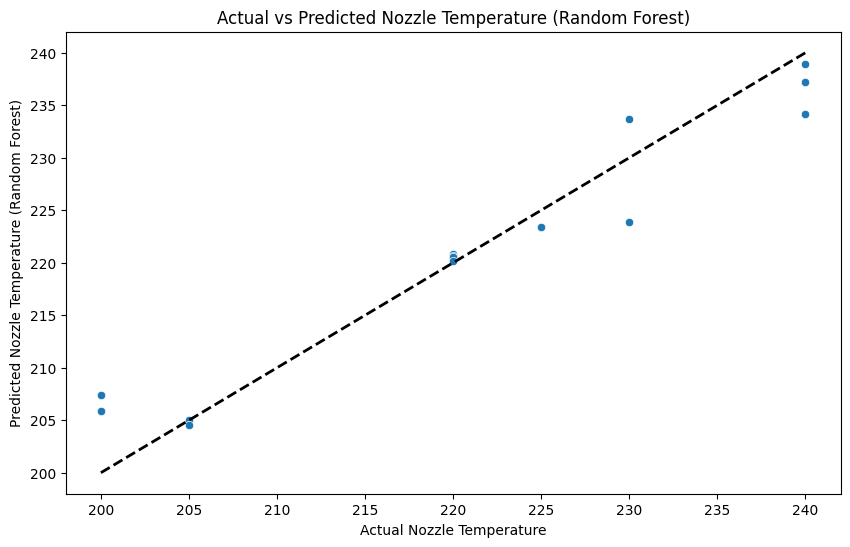

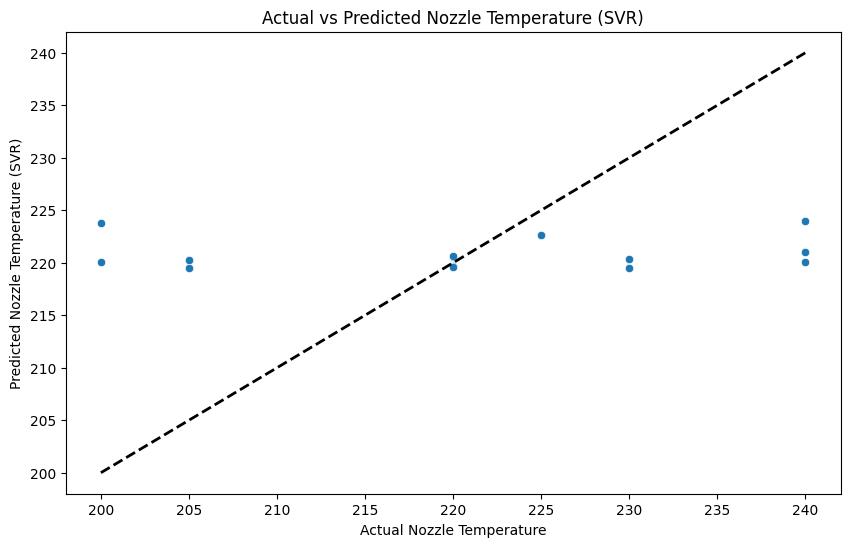

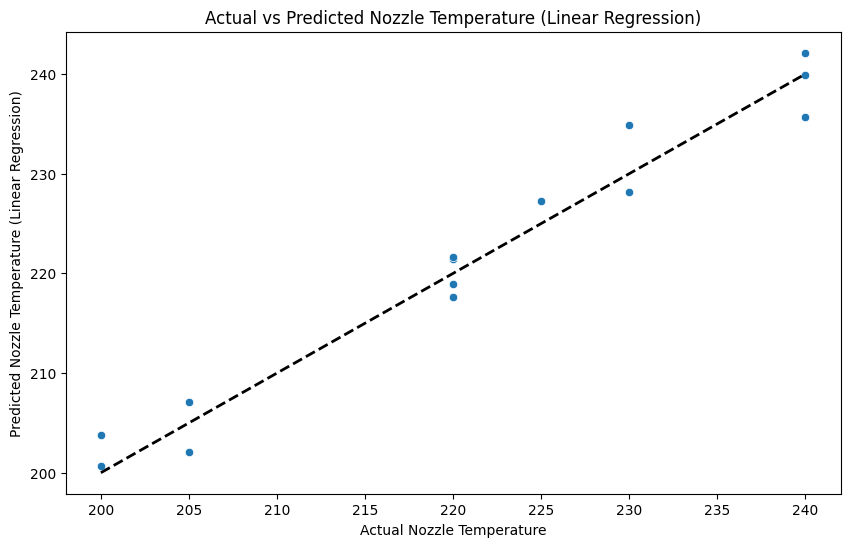

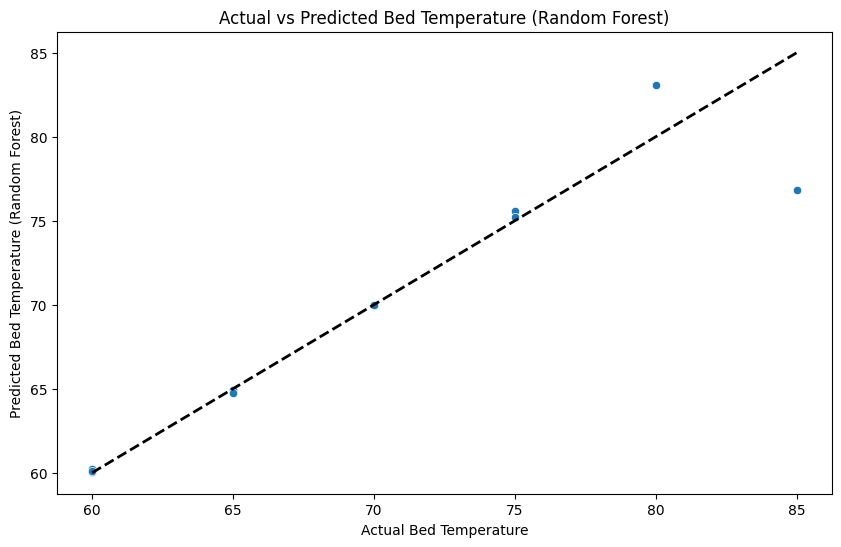

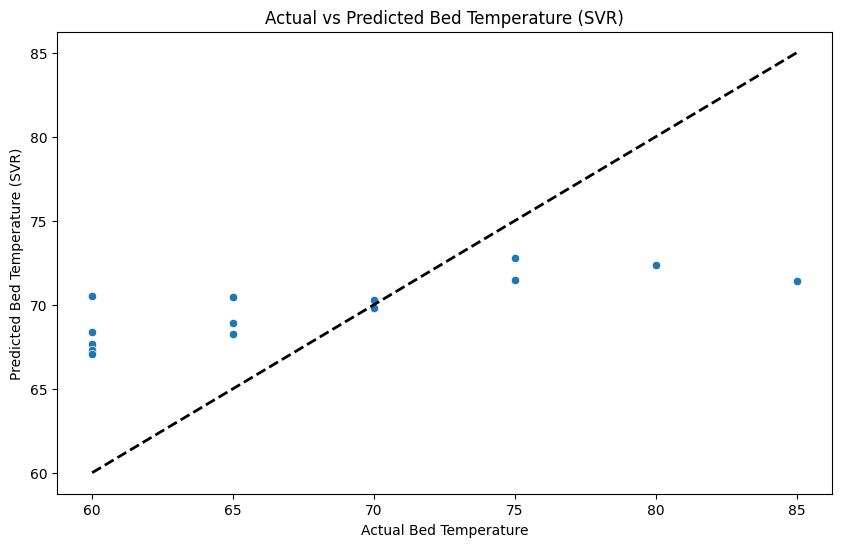

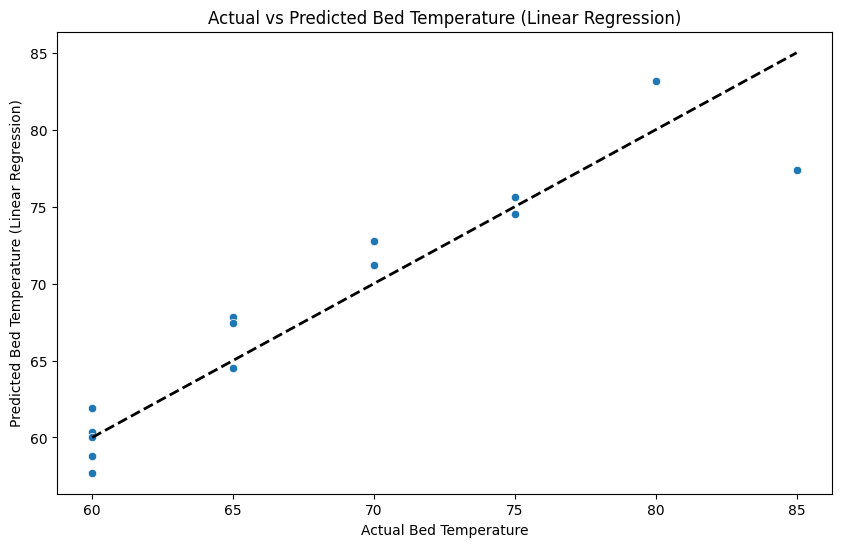

Predicted Nozzle Temp (RF): 220.05
Predicted Bed Temp (RF): 80.2
Predicted Nozzle Temp (SVR): 220.65404859753392
Predicted Bed Temp (SVR): 72.23052716742966
Predicted Nozzle Temp (LR): 218.72727408855283
Predicted Bed Temp (LR): 79.6318677231819


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/va

In [ ]:
# Add 'Print_speed' to the features
X = df[['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
        'Material', 'Fan_speed', 'Roughness', 'Tension_strenght', 'Elongation', 'Print_speed']]

# Redefine targets, excluding 'Print_speed' from y
y_nozzle = df['nozzle_temperature']
y_bed = df['Bed_temperature']

# Split data into training and test sets
X_train, X_test, y_nozzle_train, y_nozzle_test = train_test_split(
    X, y_nozzle, test_size=0.2, random_state=42)
_, _, y_bed_train, y_bed_test = train_test_split(
    X, y_bed, test_size=0.2, random_state=42)

# Train Random Forest models
rf_nozzle = RandomForestRegressor(random_state=42)
rf_nozzle.fit(X_train, y_nozzle_train)

rf_bed = RandomForestRegressor(random_state=42)
rf_bed.fit(X_train, y_bed_train)

# Predict with Random Forest
y_nozzle_pred_rf = rf_nozzle.predict(X_test)
y_bed_pred_rf = rf_bed.predict(X_test)

# Evaluate Random Forest
print("--- Random Forest Metrics ---")
print_metrics(y_nozzle_test, y_nozzle_pred_rf, 'Nozzle Temperature')
print_metrics(y_bed_test, y_bed_pred_rf, 'Bed Temperature')

# Train SVR models
svr_nozzle = SVR()
svr_nozzle.fit(X_train, y_nozzle_train)

svr_bed = SVR()
svr_bed.fit(X_train, y_bed_train)

# Predict with SVR
y_nozzle_pred_svr = svr_nozzle.predict(X_test)
y_bed_pred_svr = svr_bed.predict(X_test)

# Evaluate SVR
print("--- SVR Metrics ---")
print_metrics(y_nozzle_test, y_nozzle_pred_svr, 'Nozzle Temperature')
print_metrics(y_bed_test, y_bed_pred_svr, 'Bed Temperature')


# Train Linear Regression models
lr_nozzle = LinearRegression()
lr_nozzle.fit(X_train, y_nozzle_train)

lr_bed = LinearRegression()
lr_bed.fit(X_train, y_bed_train)

# Predict with Linear Regression
y_nozzle_pred_lr = lr_nozzle.predict(X_test)
y_bed_pred_lr = lr_bed.predict(X_test)

# Evaluate Linear Regression
print("--- Linear Regression Metrics ---")
print_metrics(y_nozzle_test, y_nozzle_pred_lr, 'Nozzle Temperature')
print_metrics(y_bed_test, y_bed_pred_lr, 'Bed Temperature')

# Function to plot predictions vs actuals for a given model and target
def plot_predictions_vs_actuals(y_true, y_pred, target_name, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name} ({model_name})")
    plt.title(f"Actual vs Predicted {target_name} ({model_name})")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.show()

# Plotting for Nozzle Temperature
plot_predictions_vs_actuals(y_nozzle_test, y_nozzle_pred_rf, 'Nozzle Temperature', 'Random Forest')
plot_predictions_vs_actuals(y_nozzle_test, y_nozzle_pred_svr, 'Nozzle Temperature', 'SVR')
plot_predictions_vs_actuals(y_nozzle_test, y_nozzle_pred_lr, 'Nozzle Temperature', 'Linear Regression')

# Plotting for Bed Temperature
plot_predictions_vs_actuals(y_bed_test, y_bed_pred_rf, 'Bed Temperature', 'Random Forest')
plot_predictions_vs_actuals(y_bed_test, y_bed_pred_svr, 'Bed Temperature', 'SVR')
plot_predictions_vs_actuals(y_bed_test, y_bed_pred_lr, 'Bed Temperature', 'Linear Regression')

# Example: Predict for a new sample with Print_speed included
# Modify the values as needed for your use case
# Example: PLA, grid, layer_height=0.2, wall_thickness=1.0, infill_density=20, fan_speed=100, roughness=30, tension_strenght=25, elongation=1.7, print_speed=60
new_sample_with_speed = [[0.2, 1.0, 20, le_infill_pattern.transform(['grid'])[0],
                          le_material.transform(['pla'])[0], 100, 30, 25, 1.7, 60]]
print('Predicted Nozzle Temp (RF):', rf_nozzle.predict(new_sample_with_speed)[0])
print('Predicted Bed Temp (RF):', rf_bed.predict(new_sample_with_speed)[0])

print('Predicted Nozzle Temp (SVR):', svr_nozzle.predict(new_sample_with_speed)[0])
print('Predicted Bed Temp (SVR):', svr_bed.predict(new_sample_with_speed)[0])

print('Predicted Nozzle Temp (LR):', lr_nozzle.predict(new_sample_with_speed)[0])
print('Predicted Bed Temp (LR):', lr_bed.predict(new_sample_with_speed)[0])
